In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [6]:
type(x_train[0])
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [4]:
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 16s 9ms/step - loss: 1.2822 - accuracy: 0.5565 - val_loss: 1.0011 - val_accuracy: 0.6528
Epoch 2/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8408 - accuracy: 0.7104 - val_loss: 0.8484 - val_accuracy: 0.7044
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6895 - accuracy: 0.7634 - val_loss: 0.9136 - val_accuracy: 0.6953
Epoch 4/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5807 - accuracy: 0.8001 - val_loss: 0.6113 - val_accuracy: 0.7915
Epoch 5/50
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4888 - accuracy: 0.8315 - val_loss: 0.6017 - val_accuracy: 0.8038
Epoch 6/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.4264 - accuracy: 0.8527 - val_loss: 0.6901 - val_accuracy: 0.7751
Epoch 7/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.3519 - accuracy: 0.8785 - val_loss: 0.5726 - val_ac

In [8]:
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.5347 - accuracy: 0.8314 - val_loss: 0.4982 - val_accuracy: 0.8360
Epoch 2/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.4285 - accuracy: 0.8598 - val_loss: 0.4846 - val_accuracy: 0.8427
Epoch 3/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.3955 - accuracy: 0.8686 - val_loss: 0.4560 - val_accuracy: 0.8539
Epoch 4/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.3712 - accuracy: 0.8759 - val_loss: 0.4535 - val_accuracy: 0.8526
Epoch 5/50
1562/1562 [==============================] - 16s 10ms/step - loss: 0.3587 - accuracy: 0.8781 - val_loss: 0.5156 - val_accuracy: 0.8430
Epoch 6/50
1562/1562 [==============================] - 19s 12ms/step - loss: 0.3363 - accuracy: 0.8866 - val_loss: 0.4388 - val_accuracy: 0.8560
Epoch 7/50
1562/1562 [==============================] - 17s 11ms/step - loss: 0.3293 - accuracy: 0.8900 - val_loss: 0.4390 -

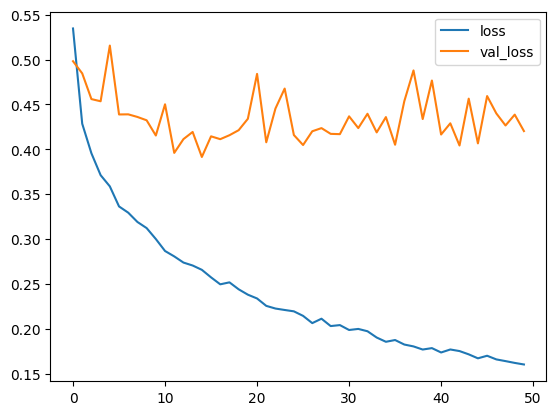

In [9]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

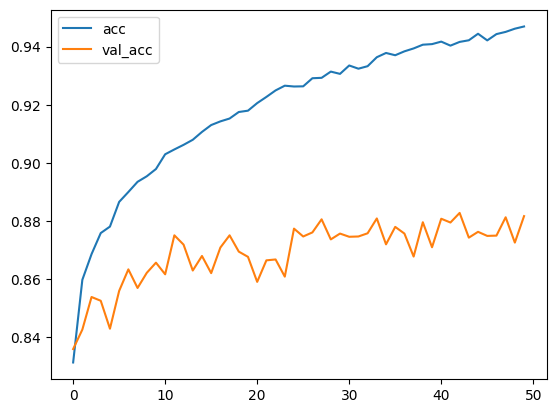

In [10]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[905   8  23  13   3   1   5   2  27  13]
 [  4 962   0   0   1   0   3   0   5  25]
 [ 26   2 799  53  36  17  50  10   5   2]
 [ 14   1  19 788  31  58  59  11   6  13]
 [  9   1  23  33 882   9  30  10   2   1]
 [  4   0  18 126  30 767  28  21   3   3]
 [  4   2   5  27   6   3 949   0   3   1]
 [ 13   0   8  21  28  15   9 901   1   4]
 [ 26  11   1   6   0   0   1   2 933  20]
 [  7  34   1   7   0   0   6   4  10 931]]


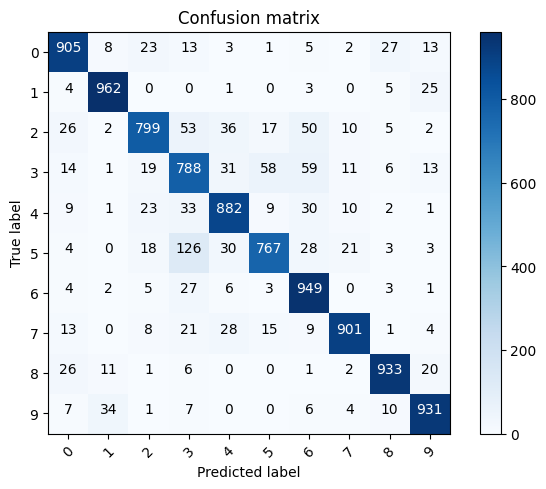

In [11]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [12]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

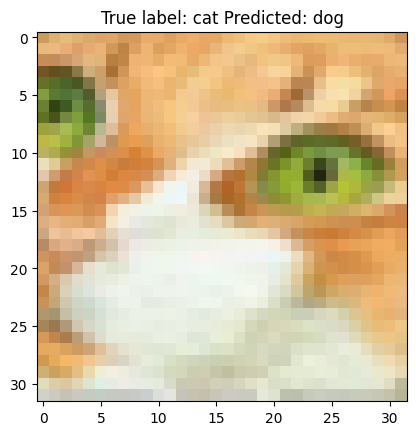

In [13]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));